In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import plotly.express as px
from datetime import datetime

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/hotel_bookings.csv")
data = data.copy()
data.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [6]:
# data tipi hakkında bilgiler
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
# data'nın boyutu
data.shape

(119390, 32)

In [8]:
# data'nın bazı istatistik bilgileri
data.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [9]:
# data'nın ne kadar eksik verisi olduğuna bakalım
data.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [10]:
# eksik verilerin data'da yüzde kaç eksik olduğuna bakalım
data.isna().sum() / data.shape[0] * 100

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

company kolonunun %94.30 olması bizim bu kolonu doldurabilecek yeterli veri olmadığını böylece ileriki kullanımda bu kolonun kaldırılması daha mantıklı olabilir.

In [11]:
# Birazda verilerin kendi içindeki değerlerine bakalım
data["hotel"].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [12]:
data["is_canceled"].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

In [13]:
data["arrival_date_month"].value_counts()

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

In [14]:
data["deposit_type"].value_counts()

No Deposit    104641
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64

In [15]:
data["customer_type"].value_counts()

Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: customer_type, dtype: int64

## Eksik Verilerin Doldurulması

Burada birkaç metod deneyeceğiz bu metodlara göre en iyi sonuç vereni uygulayacağız

1.Deneme

2.Deneme

3.Deneme

Agent veya Company gibi bazı kategorik değişkenlerde kategorilerden biri olarak “NULL” sunulmaktadır. Bu eksik bir değer olarak değil, “uygulanamaz” olarak değerlendirilmelidir. Örneğin, bir rezervasyon "Acente", "NULL" olarak tanımlanırsa, rezervasyonun bir seyahat acentesinden gelmediği anlamına gelir.

In [16]:
data["agent"] = data["agent"].fillna("Not Applicable")
data["company"] = data["company"].fillna("Not Applicable")
data["children"] = data["children"].fillna(0)
data["country"] = data["country"].fillna("Unknown")

Ebeveyn, çocuk ve bebek = 0 olanları kaldıralım. Çünkü müşteri olmadığı anlamına gelir

In [17]:
data = data.drop(data[(data.adults+data.babies+data.children)==0].index)

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
data['country']= data['country'].astype(str)

In [20]:
le = LabelEncoder()
data['hotel'] = le.fit_transform(data['hotel'])
data['meal'] = le.fit_transform(data['meal'])
data['country'] = le.fit_transform(data['country'])
data['market_segment']= le.fit_transform(data['market_segment'])
data['distribution_channel']=le.fit_transform(data['distribution_channel'])
data['reserved_room_type'] = le.fit_transform(data['reserved_room_type'])
data['assigned_room_type'] = le.fit_transform(data['assigned_room_type'])
data['deposit_type'] = le.fit_transform(data['deposit_type'])
data['customer_type'] = le.fit_transform(data['customer_type'])
data['reservation_status'] = le.fit_transform(data['reservation_status'])
data['agent'] = le.fit_transform(data['agent'].astype(str))
data['company'] = le.fit_transform(data['company'].astype(str))

In [21]:
data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'])

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119210 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119210 non-null  int64         
 1   is_canceled                     119210 non-null  int64         
 2   lead_time                       119210 non-null  int64         
 3   arrival_date_year               119210 non-null  int64         
 4   arrival_date_month              119210 non-null  object        
 5   arrival_date_week_number        119210 non-null  int64         
 6   arrival_date_day_of_month       119210 non-null  int64         
 7   stays_in_weekend_nights         119210 non-null  int64         
 8   stays_in_week_nights            119210 non-null  int64         
 9   adults                          119210 non-null  int64         
 10  children                        119210 non-null  float64

In [23]:
data['arrival_date_month'] = data['arrival_date_month'].map({'January':1, 'February': 2, 'March':3, 'April':4, 
                                                             'May':5, 'June':6, 'July':7,'August':8, 
                                                             'September':9, 'October':10, 'November':11,'December':12})

In [24]:
data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'])

In [25]:
data['Total Guests'] = data['adults'] + data['children'] + data["babies"]

In [26]:
data = data[data['Total Guests'] != 0]

In [27]:
data['Total Stays'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']

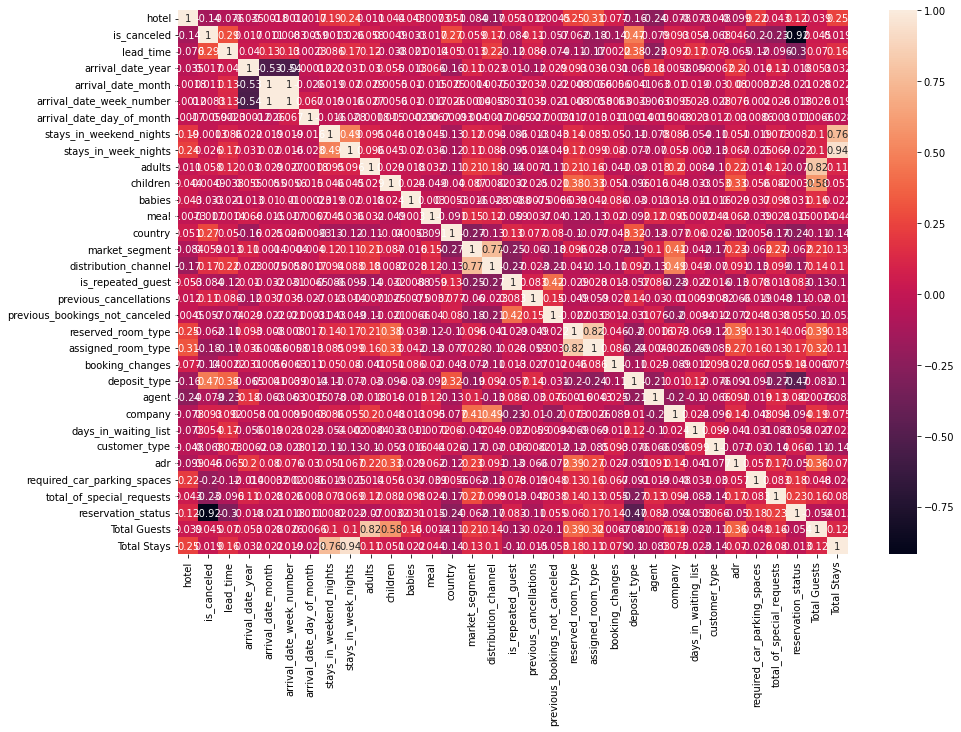

In [28]:
plt.figure(figsize=(15,10))
corr = data.corr()
sns.heatmap(corr , annot=True)

In [30]:
from sklearn.model_selection import train_test_split , GridSearchCV , cross_val_score , cross_val_predict
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report , log_loss
from sklearn.metrics import roc_auc_score , roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier


from warnings import filterwarnings
filterwarnings('ignore')

In [31]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'Total Guests',
       'Total Stays'],
      dtype='object')

In [32]:
X = data.drop(["is_canceled" , "reservation_status_date"] , axis=1)
y = data["is_canceled"] 

In [33]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.30 , random_state=42)

## Logistic Regression

In [54]:
loj = LogisticRegression()
loj_model = loj.fit(x_train , y_train)
loj_model

LogisticRegression()

In [55]:
y_pred = loj_model.predict(x_test)

In [56]:
accuracy_score(y_test , y_pred)

0.7898945837877136

In [57]:
cross_val_score(loj_model , x_test , y_test , cv=10).mean()

0.7757459180233645

In [58]:
conf = confusion_matrix(y_test , y_pred)
conf

array([[19598,  2863],
       [ 4651,  8651]])

In [59]:
clf_report = classification_report(y_test, y_pred)
print(clf_report)

              precision    recall  f1-score   support

           0       0.81      0.87      0.84     22461
           1       0.75      0.65      0.70     13302

    accuracy                           0.79     35763
   macro avg       0.78      0.76      0.77     35763
weighted avg       0.79      0.79      0.79     35763



In [60]:
loj_model.predict_proba(X)[0:10] #0.indexinde 0.sınıfa ait olma olasılığı; 1.indexinde 1.sınıfa ait olma olasılığı

array([[0.90766895, 0.09233105],
       [0.84530359, 0.15469641],
       [0.90639073, 0.09360927],
       [0.87192402, 0.12807598],
       [0.6924346 , 0.3075654 ],
       [0.6924346 , 0.3075654 ],
       [0.74700783, 0.25299217],
       [0.81861488, 0.18138512],
       [0.32615273, 0.67384727],
       [0.61288754, 0.38711246]])

In [61]:
y_probs = loj_model.predict_proba(X)
y_probs = y_probs[:,1]

In [62]:
y_pred2 = [1 if i>0.5 else 0 for i in y_probs]

In [63]:
y_pred2[0:10]

[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

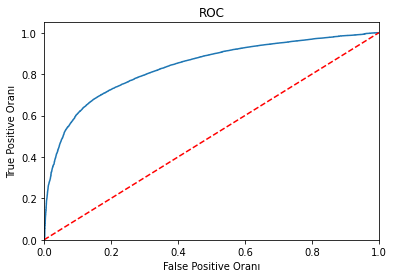

In [64]:
logit_roc_auc = roc_auc_score(y, loj_model.predict(X))

fpr , tpr , thresholds = roc_curve(y, loj_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr , tpr , label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1] , [0,1] , 'r--')
plt.xlim([0.0 , 1.0])
plt.ylim([0.0 , 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

## Gaussian NB

In [65]:
nb = GaussianNB()
nb_model = nb.fit(x_train , y_train)
nb_model

GaussianNB()

In [66]:
y_pred = nb_model.predict(x_test)

In [67]:
accuracy_score(y_test , y_pred)

0.9922545647736487

In [68]:
cross_val_score(nb_model , x_test , y_test , cv=10).mean()

0.9918911308202605

In [69]:
conf = confusion_matrix(y_test , y_pred)
conf

array([[22184,   277],
       [    0, 13302]])

In [70]:
clf_report = classification_report(y_test, y_pred)
print(clf_report)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     22461
           1       0.98      1.00      0.99     13302

    accuracy                           0.99     35763
   macro avg       0.99      0.99      0.99     35763
weighted avg       0.99      0.99      0.99     35763



## KNN

In [73]:
knn = KNeighborsClassifier()
knn_model = knn.fit(x_train , y_train)
knn_model

KNeighborsClassifier()

In [74]:
y_pred = knn_model.predict(x_test)

In [75]:
accuracy_score(y_test , y_pred)

0.8046864077398429

In [76]:
clf_report = classification_report(y_test, y_pred)
print(clf_report)

              precision    recall  f1-score   support

           0       0.83      0.86      0.85     22461
           1       0.75      0.71      0.73     13302

    accuracy                           0.80     35763
   macro avg       0.79      0.79      0.79     35763
weighted avg       0.80      0.80      0.80     35763



In [77]:
knn_params = {"n_neighbors" : np.arange(1,10)}

In [78]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn , knn_params , cv=10)
knn_cv.fit(x_train , y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [79]:
print("En iyi skor: " + str(knn_cv.best_score_))
print("En iyi paramtreler: " + str(knn_cv.best_params_))

En iyi skor: 0.8158112142521083
En iyi paramtreler: {'n_neighbors': 2}


In [80]:
knn = KNeighborsClassifier(2)
knn_tuned = knn.fit(x_train , y_train)

In [81]:
knn_tuned.score(x_test , y_test)

0.8207644772530269

In [82]:
y_pred = knn_tuned.predict(x_test)
accuracy_score(y_test , y_pred)

0.8207644772530269

In [88]:
acs = accuracy_score(y_test , y_pred)
acs

0.8207644772530269

In [83]:
clf_report_knn = classification_report(y_test, y_pred)
print(clf_report_knn)

              precision    recall  f1-score   support

           0       0.81      0.93      0.87     22461
           1       0.85      0.63      0.72     13302

    accuracy                           0.82     35763
   macro avg       0.83      0.78      0.80     35763
weighted avg       0.82      0.82      0.81     35763



In [90]:
import pickle

dosya = "knn_model"

In [91]:
pickle.dump(knn_tuned , open(dosya , 'wb'))

yuklenen = pickle.load(open(dosya,'rb'))
print(yuklenen.predict(x_test))

[0 0 1 ... 1 0 1]


In [85]:
print(yuklenen.score(x_test , y_test))

0.8207644772530269


In [86]:
pickle.dump(clf_report_knn , open(dosya , 'wb'))

clf_reportt_knn = pickle.load(open(dosya,'rb'))
print(clf_reportt_knn)

              precision    recall  f1-score   support

           0       0.81      0.93      0.87     22461
           1       0.85      0.63      0.72     13302

    accuracy                           0.82     35763
   macro avg       0.83      0.78      0.80     35763
weighted avg       0.82      0.82      0.81     35763



In [89]:
pickle.dump(acs , open(dosya , 'wb'))

acs = pickle.load(open(dosya,'rb'))
print(acs)

0.8207644772530269


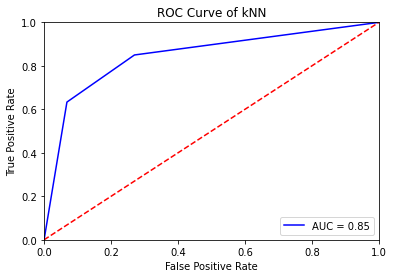

In [94]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

y_scores = knn.predict_proba(x_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

## SVC

In [209]:
svc_model = SVC(kernel = "linear").fit(x_train , y_train)
svc_model

SVC(kernel='linear')

In [210]:
y_pred = svc_model.predict(x_test)

In [211]:
accuracy_score(y_test , y_pred)

0.9902972345720438

Model Tuning

In [212]:
svc_params = {"C" : np.arange(1,10)}

svc = SVC(kernel = "linear")

svc_cv_model = GridSearchCV(svc , svc_params , cv=10 , n_jobs = -1 , verbose = 2)

svc_cv_model.fit(x_train , y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


KeyboardInterrupt: ignored

In [ ]:
print("En iyi paramtreler: " + str(svc_cv_model.best_params_))

In [ ]:
svc_tuned = SVC(kernel = "linear" , C = 4).fit(x_train ,y_train)

In [ ]:
svc_tuned.predict(x_test)
accuracy_score(y_test , y_pred)

1.0

In [ ]:
clf_report_svc = classification_report(y_test, y_pred)
print(clf_report_svc)

In [ ]:
dosya = "svc_model"

pickle.dump(svc_tuned , open(dosya , 'wb'))

yuklenen = pickle.load(open(dosya,'rb'))
print(yuklenen.predict(x_test))

# RBF SVC

In [ ]:
svc_model = SVC(kernel = 'rbf').fit(x_train , y_train)
svc_model

SVC()

In [ ]:
y_pred = svc_model.predict(x_test)
accuracy_score(y_test , y_pred)

0.7251628778346335

Model Tuning

In [ ]:
svc_params = {"C" : [0.1,1,5,10],
              "gamma" :  [0.1,1,5,10]}

In [ ]:
svc = SVC()
svc_cv_model = GridSearchCV(svc, svc_params , cv = 10 , n_jobs = -1 , verbose = 2)
svc_cv_model.fit(x_train , y_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


KeyboardInterrupt: ignored

In [ ]:
print("En iyi paramtreler: " + str(svc_cv_model.best_params_))

In [ ]:
svc = SVC(C =  , gamma = ).fit(x_train , y_train) 

In [ ]:
y_pred = svc_tuned.predict(x_test)
accuracy_score(y_test , y_pred)

## Decision Tree Classifier

In [149]:
cart = DecisionTreeClassifier()
cart_model = cart.fit(x_train , y_train)
cart_model

DecisionTreeClassifier()

In [150]:
y_pred = cart_model.predict(x_test)
accuracy_score(y_test , y_pred)

1.0

Model Tuning

In [157]:
cart_grid = {"max_depth": list(range(1,5)),
             "min_samples_split": list(range(2,5))} 

In [158]:
cart = tree.DecisionTreeClassifier()
cart_cv = GridSearchCV(cart , cart_grid , cv = 10 , n_jobs = -1 , verbose = 2)
cart_cv_model = cart_cv.fit(x_train , y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


In [159]:
print("En iyi paramtreler: " + str(cart_cv_model.best_params_))

En iyi paramtreler: {'max_depth': 2, 'min_samples_split': 2}


In [160]:
cart = tree.DecisionTreeClassifier(max_depth = 2 , min_samples_split = 2 )
cart_tuned = cart.fit(x_train , y_train)

In [161]:
y_pred = cart_tuned.predict(x_test)
accuracy_score(y_test , y_pred)

1.0

In [162]:
acs_cart = accuracy_score(y_test , y_pred)
acs_cart

1.0

In [163]:
clf_report_cart = classification_report(y_test, y_pred)
print(clf_report_cart)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22461
           1       1.00      1.00      1.00     13302

    accuracy                           1.00     35763
   macro avg       1.00      1.00      1.00     35763
weighted avg       1.00      1.00      1.00     35763



In [164]:
dosya = "cart_model"

In [165]:
pickle.dump(cart_tuned , open(dosya , 'wb'))

cartt = pickle.load(open(dosya,'rb'))
print(cartt.predict(x_test))

[0 0 1 ... 1 0 1]


In [166]:
print(cartt.score(x_test , y_test))

1.0


In [167]:
pickle.dump(clf_report_cart , open(dosya , 'wb'))

clf_report_cart = pickle.load(open(dosya,'rb'))
print(clf_report_cart)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22461
           1       1.00      1.00      1.00     13302

    accuracy                           1.00     35763
   macro avg       1.00      1.00      1.00     35763
weighted avg       1.00      1.00      1.00     35763



In [168]:
pickle.dump(acs_cart , open(dosya , 'wb'))

acs_cart = pickle.load(open(dosya,'rb'))
print(acs_cart)

1.0


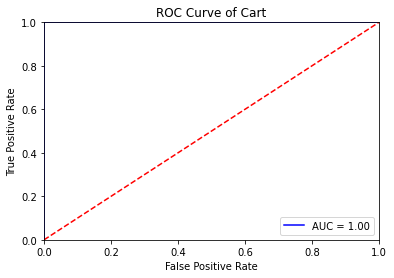

In [169]:
y_scores = cart.predict_proba(x_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Cart')
plt.show()

### Random Forest

In [170]:
rf_model = RandomForestClassifier().fit(x_train , y_train)
rf_model

RandomForestClassifier()

In [171]:
y_pred = rf_model.predict(x_test)
accuracy_score(y_test , y_pred)

0.999972038139977

Model Tuning

In [174]:
rf_params = {"max_depth": [2,5],
             "max_features": [5,8],
             "n_estimators": [100,500],
             "min_samples_split": [2,5]}

In [175]:
rf_model = RandomForestClassifier()

rf_cv_model = GridSearchCV(rf_model , 
                           rf_params,
                           cv = 10,
                           n_jobs = -1,
                           verbose = 2)
rf_cv_model.fit(x_train , y_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5], 'max_features': [5, 8],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 500]},
             verbose=2)

In [176]:
print("En iyi paramtreler: " + str(rf_cv_model.best_params_))

En iyi paramtreler: {'max_depth': 5, 'max_features': 8, 'min_samples_split': 2, 'n_estimators': 100}


In [177]:
rf_tuned = RandomForestClassifier(max_depth = 5,
                                  min_samples_split = 2,
                                  n_estimators = 100,
                                  max_features = 8)
rf_tuned.fit(x_train , y_train)

RandomForestClassifier(max_depth=5, max_features=8)

In [178]:
y_pred = rf_tuned.predict(x_test)
accuracy_score(y_test , y_pred)

0.9927019545340156

In [179]:
acs_rf = accuracy_score(y_test , y_pred)
acs_rf

0.9927019545340156

In [180]:
clf_report_rf = classification_report(y_test, y_pred)
print(clf_report_rf)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     22461
           1       1.00      0.98      0.99     13302

    accuracy                           0.99     35763
   macro avg       0.99      0.99      0.99     35763
weighted avg       0.99      0.99      0.99     35763



In [181]:
dosya = "rf_model"

In [182]:
pickle.dump(rf_tuned , open(dosya , 'wb'))

rf_tuned = pickle.load(open(dosya,'rb'))
print(rf_tuned.predict(x_test))

[0 0 1 ... 1 0 1]


In [183]:
print(rf_tuned.score(x_test , y_test))

0.9927019545340156


In [184]:
pickle.dump(clf_report_rf , open(dosya , 'wb'))

clf_report_rf = pickle.load(open(dosya,'rb'))
print(clf_report_rf)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     22461
           1       1.00      0.98      0.99     13302

    accuracy                           0.99     35763
   macro avg       0.99      0.99      0.99     35763
weighted avg       0.99      0.99      0.99     35763



In [185]:
pickle.dump(acs_rf , open(dosya , 'wb'))

acs_rf = pickle.load(open(dosya,'rb'))
print(acs_rf)

0.9927019545340156


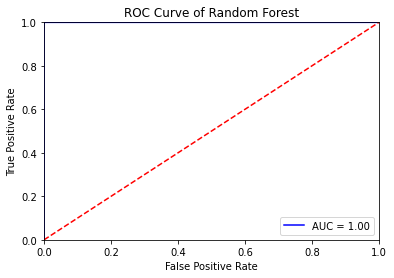

In [186]:
y_scores = rf_tuned.predict_proba(x_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Random Forest')
plt.show()

In [197]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                          index = x_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

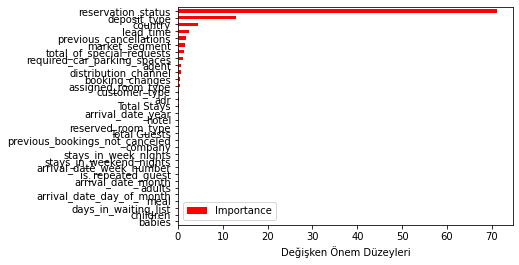

In [198]:
Importance.sort_values(by = "Importance",
                       axis = 0,
                       ascending = True).plot(kind = "barh" , color = "r")
plt.xlabel("Değişken Önem Düzeyleri")

### GBM

In [189]:
gbm_model = GradientBoostingClassifier().fit(x_train , y_train)

In [190]:
y_pred = gbm_model.predict(x_test)
accuracy_score(y_test , y_pred)

1.0

Model Tuning

In [191]:
gbm_params = {"learning_rate": [0.01,0.1,0.05],
              "n_estimators": [100,500],
              "max_depth": [3,5],
              "min_samples_split": [2,5]}

In [192]:
gbm = GradientBoostingClassifier()

gbm_cv_model = GridSearchCV(gbm , gbm_params , n_jobs = -1 , verbose = 2)
gbm_cv_model.fit(x_train , y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.05],
                         'max_depth': [3, 5], 'min_samples_split': [2, 5],
                         'n_estimators': [100, 500]},
             verbose=2)

In [193]:
print("En iyi paramtreler: " + str(gbm_cv_model.best_params_))

En iyi paramtreler: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 100}


In [194]:
gbm = GradientBoostingClassifier(learning_rate = 0.01,
                                 n_estimators = 100,
                                 max_depth = 3,
                                 min_samples_split = 2)

In [195]:
gbm_tuned = gbm.fit(x_train , y_train)

In [196]:
y_pred = gbm_tuned.predict(x_test)
accuracy_score(y_test , y_pred)

1.0

In [199]:
Importance = pd.DataFrame({"Importance": gbm_tuned.feature_importances_*100},
                          index = x_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

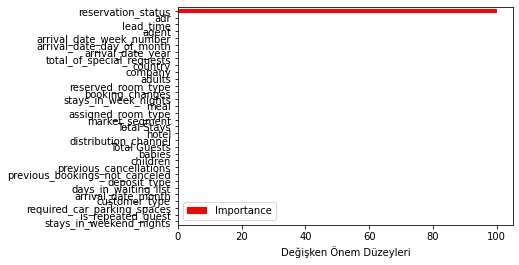

In [200]:
Importance.sort_values(by = "Importance",
                       axis = 0,
                       ascending = True).plot(kind = "barh" , color = "r")
plt.xlabel("Değişken Önem Düzeyleri")

In [201]:
acs_gbm = accuracy_score(y_test , y_pred)

In [202]:
clf_report_gbm = classification_report(y_test, y_pred)
print(clf_report_gbm)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22461
           1       1.00      1.00      1.00     13302

    accuracy                           1.00     35763
   macro avg       1.00      1.00      1.00     35763
weighted avg       1.00      1.00      1.00     35763



In [203]:
dosya = "gbm"

In [204]:
pickle.dump(gbm_tuned , open(dosya , 'wb'))

gbmm = pickle.load(open(dosya,'rb'))
print(gbmm.predict(x_test))

[0 0 1 ... 1 0 1]


In [205]:
print(gbmm.score(x_test , y_test))

1.0


In [206]:
pickle.dump(clf_report_gbm , open(dosya , 'wb'))

clf_report_gbm = pickle.load(open(dosya,'rb'))
print(clf_report_gbm)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22461
           1       1.00      1.00      1.00     13302

    accuracy                           1.00     35763
   macro avg       1.00      1.00      1.00     35763
weighted avg       1.00      1.00      1.00     35763



In [207]:
pickle.dump(acs_gbm , open(dosya , 'wb'))

acs_gbm = pickle.load(open(dosya,'rb'))
print(acs_gbm)

1.0


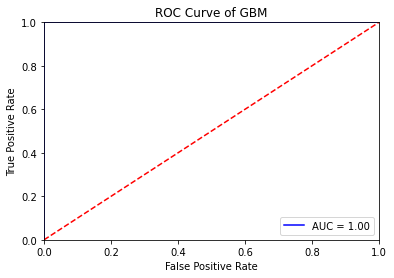

In [208]:
y_scores = gbm.predict_proba(x_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of GBM')
plt.show()

# XGBoost

In [95]:
xgb_model = XGBClassifier().fit(x_train , y_train)
xgb_model

XGBClassifier()

In [96]:
y_pred = xgb_model.predict(x_test)
accuracy_score(y_test , y_pred)

1.0

Model Tuning

In [97]:
xgb_params = {"n_estimators": [100],
              "subsample": [0.6,0.8],
              "max_depth": [3,4],
              "learning_rate": [0.1,0.02],
              "min_samples_split": [2,5]}

In [98]:
xgb = XGBClassifier()

xgb_cv_model = GridSearchCV(xgb , xgb_params , cv = 10 , n_jobs = -1 , verbose = 2)
xgb_cv_model.fit(x_train , y_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


GridSearchCV(cv=10, estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.02], 'max_depth': [3, 4],
                         'min_samples_split': [2, 5], 'n_estimators': [100],
                         'subsample': [0.6, 0.8]},
             verbose=2)

In [99]:
xgb_cv_model.best_params_

{'learning_rate': 0.1,
 'max_depth': 3,
 'min_samples_split': 2,
 'n_estimators': 100,
 'subsample': 0.6}

In [100]:
xgb = XGBClassifier(learning_rate = 0.1 ,
                    max_depth = 3,
                    min_samples_split = 2,
                    subsample = 0.6,
                    n_estimators = 100)

In [101]:
xgb_tuned = xgb.fit(x_train , y_train)

In [102]:
y_pred = xgb_tuned.predict(x_test)
accuracy_score(y_test , y_pred)

1.0

In [103]:
acs_xgb = accuracy_score(y_test , y_pred)

In [104]:
clf_report_xgb = classification_report(y_test, y_pred)
print(clf_report_xgb)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22461
           1       1.00      1.00      1.00     13302

    accuracy                           1.00     35763
   macro avg       1.00      1.00      1.00     35763
weighted avg       1.00      1.00      1.00     35763



In [105]:
dosya = "xgboost"

In [106]:
pickle.dump(xgb_tuned , open(dosya , 'wb'))

xgboost = pickle.load(open(dosya,'rb'))
print(xgboost.predict(x_test))

[0 0 1 ... 1 0 1]


In [107]:
print(xgboost.score(x_test , y_test))

1.0


In [108]:
pickle.dump(clf_report_xgb , open(dosya , 'wb'))

clf_report_xgb = pickle.load(open(dosya,'rb'))
print(clf_report_xgb)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22461
           1       1.00      1.00      1.00     13302

    accuracy                           1.00     35763
   macro avg       1.00      1.00      1.00     35763
weighted avg       1.00      1.00      1.00     35763



In [109]:
pickle.dump(acs_xgb , open(dosya , 'wb'))

acs_xgb = pickle.load(open(dosya,'rb'))
print(acs_xgb)

1.0


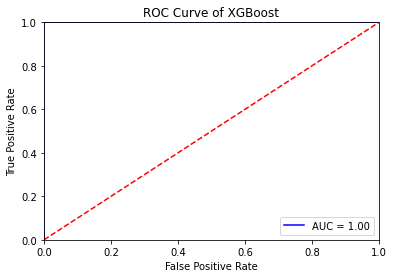

In [133]:
y_scores = xgb.predict_proba(x_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of XGBoost')
plt.show()

# LightGBM

In [111]:
lgbm_model = LGBMClassifier().fit(x_train , y_train)

In [112]:
y_pred = lgbm_model.predict(x_test)
accuracy_score(y_test , y_pred)

1.0

Model Tuning

In [113]:
lgbm_params = {"learning_rate": [0.1,0.05],
               "max_depth": [3,4],
               "min_samples_split": [5,10],
               "subsample": [0.6,0.8] ,
               "n_estimators": [100]}

In [114]:
lgbm = LGBMClassifier()

lgbm_cv_model = GridSearchCV(lgbm , lgbm_params , cv = 10 , n_jobs = -1 , verbose = 2)
lgbm_cv_model.fit(x_train , y_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


GridSearchCV(cv=10, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.05], 'max_depth': [3, 4],
                         'min_samples_split': [5, 10], 'n_estimators': [100],
                         'subsample': [0.6, 0.8]},
             verbose=2)

In [115]:
lgbm_cv_model.best_params_

{'learning_rate': 0.1,
 'max_depth': 3,
 'min_samples_split': 5,
 'n_estimators': 100,
 'subsample': 0.6}

In [116]:
lgbm = LGBMClassifier(learning_rate = 0.1,
                    max_depth = 3,
                    min_samples_split = 5,
                    subsample = 0.6,
                    n_estimators = 100)

In [117]:
lgbm_tuned = lgbm.fit(x_train , y_train)

In [118]:
y_pred = lgbm_tuned.predict(x_test)
accuracy_score(y_test , y_pred)

1.0

In [132]:
acs_lgbm = accuracy_score(y_test , y_pred)

In [120]:
clf_report_lgbm = classification_report(y_test, y_pred)
print(clf_report_lgbm)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22461
           1       1.00      1.00      1.00     13302

    accuracy                           1.00     35763
   macro avg       1.00      1.00      1.00     35763
weighted avg       1.00      1.00      1.00     35763



In [121]:
dosya = "Lightgbm"

In [122]:
pickle.dump(lgbm_tuned , open(dosya , 'wb'))

lightgbmm = pickle.load(open(dosya,'rb'))
print(lightgbmm.predict(x_test))

[0 0 1 ... 1 0 1]


In [123]:
print(lightgbmm.score(x_test , y_test))

1.0


In [124]:
pickle.dump(clf_report_lgbm , open(dosya , 'wb'))

clf_report_lgbm = pickle.load(open(dosya,'rb'))
print(clf_report_lgbm)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22461
           1       1.00      1.00      1.00     13302

    accuracy                           1.00     35763
   macro avg       1.00      1.00      1.00     35763
weighted avg       1.00      1.00      1.00     35763



In [125]:
pickle.dump(acs_lgbm , open(dosya , 'wb'))

acs_lgbm = pickle.load(open(dosya,'rb'))
print(acs_lgbm)

1.0


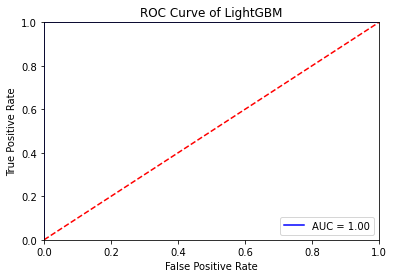

In [134]:
y_scores = lgbm.predict_proba(x_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of LightGBM')
plt.show()

# CatBoost

In [127]:
cat_model = CatBoostClassifier().fit(x_train , y_train)

Learning rate set to 0.068136
0:	learn: 0.4297538	total: 74.1ms	remaining: 1m 14s
1:	learn: 0.2562011	total: 96.2ms	remaining: 48s
2:	learn: 0.1487412	total: 116ms	remaining: 38.7s
3:	learn: 0.0882882	total: 134ms	remaining: 33.3s
4:	learn: 0.0563783	total: 157ms	remaining: 31.3s
5:	learn: 0.0359163	total: 180ms	remaining: 29.8s
6:	learn: 0.0232179	total: 210ms	remaining: 29.8s
7:	learn: 0.0158024	total: 234ms	remaining: 29s
8:	learn: 0.0108765	total: 255ms	remaining: 28.1s
9:	learn: 0.0077827	total: 276ms	remaining: 27.3s
10:	learn: 0.0055242	total: 298ms	remaining: 26.8s
11:	learn: 0.0041150	total: 321ms	remaining: 26.5s
12:	learn: 0.0031676	total: 342ms	remaining: 26s
13:	learn: 0.0024457	total: 363ms	remaining: 25.6s
14:	learn: 0.0018784	total: 383ms	remaining: 25.1s
15:	learn: 0.0014793	total: 414ms	remaining: 25.4s
16:	learn: 0.0012000	total: 434ms	remaining: 25.1s
17:	learn: 0.0010005	total: 455ms	remaining: 24.8s
18:	learn: 0.0008311	total: 475ms	remaining: 24.5s
19:	learn: 0.0

In [128]:
y_pred = cat_model.predict(x_test)
accuracy_score(y_test , y_pred)

1.0

Model Tuning

In [129]:
cat_params = {"iterations": [200,500],
              'learning_rate': [0.01,0.05,0.1],
              'depth': [3,5,8]}

In [130]:
catb = CatBoostClassifier()
catb_cv_model = GridSearchCV(catb , cat_params , cv = 10 , n_jobs =-1 , verbose =2)
catb_cv_model.fit(x_train , y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits
0:	learn: 0.6461218	total: 56.8ms	remaining: 11.3s
1:	learn: 0.6017772	total: 108ms	remaining: 10.7s
2:	learn: 0.5585510	total: 156ms	remaining: 10.2s
3:	learn: 0.5194214	total: 209ms	remaining: 10.2s
4:	learn: 0.4830352	total: 236ms	remaining: 9.19s
5:	learn: 0.4474502	total: 264ms	remaining: 8.55s
6:	learn: 0.4153868	total: 288ms	remaining: 7.95s
7:	learn: 0.3844236	total: 311ms	remaining: 7.45s
8:	learn: 0.3555822	total: 337ms	remaining: 7.16s
9:	learn: 0.3287511	total: 391ms	remaining: 7.43s
10:	learn: 0.3045171	total: 443ms	remaining: 7.61s
11:	learn: 0.2814212	total: 500ms	remaining: 7.83s
12:	learn: 0.2609325	total: 532ms	remaining: 7.65s
13:	learn: 0.2412582	total: 554ms	remaining: 7.37s
14:	learn: 0.2228706	total: 608ms	remaining: 7.5s
15:	learn: 0.2061193	total: 657ms	remaining: 7.56s
16:	learn: 0.1906614	total: 704ms	remaining: 7.58s
17:	learn: 0.1761827	total: 752ms	remaining: 7.6s
18:	learn: 0.1633518	total: 80

GridSearchCV(cv=10,
             estimator=<catboost.core.CatBoostClassifier object at 0x7f1c4c9acc50>,
             n_jobs=-1,
             param_grid={'depth': [3, 5, 8], 'iterations': [200, 500],
                         'learning_rate': [0.01, 0.05, 0.1]},
             verbose=2)

In [131]:
catb_cv_model.best_params_

{'depth': 3, 'iterations': 200, 'learning_rate': 0.01}

In [135]:
catb = CatBoostClassifier(iterations = 200,
                          learning_rate = 0.01,
                          depth = 3)
catb_tuned = catb.fit(x_train , y_train)

0:	learn: 0.6461218	total: 19.5ms	remaining: 3.88s
1:	learn: 0.6017772	total: 36.5ms	remaining: 3.62s
2:	learn: 0.5585510	total: 53.3ms	remaining: 3.5s
3:	learn: 0.5194214	total: 70.2ms	remaining: 3.44s
4:	learn: 0.4830352	total: 87.2ms	remaining: 3.4s
5:	learn: 0.4474502	total: 104ms	remaining: 3.37s
6:	learn: 0.4153868	total: 121ms	remaining: 3.34s
7:	learn: 0.3844236	total: 138ms	remaining: 3.32s
8:	learn: 0.3555822	total: 155ms	remaining: 3.3s
9:	learn: 0.3287511	total: 173ms	remaining: 3.28s
10:	learn: 0.3045171	total: 190ms	remaining: 3.26s
11:	learn: 0.2814212	total: 206ms	remaining: 3.23s
12:	learn: 0.2609325	total: 228ms	remaining: 3.28s
13:	learn: 0.2412582	total: 249ms	remaining: 3.3s
14:	learn: 0.2228706	total: 266ms	remaining: 3.28s
15:	learn: 0.2061193	total: 288ms	remaining: 3.31s
16:	learn: 0.1906614	total: 316ms	remaining: 3.4s
17:	learn: 0.1761827	total: 334ms	remaining: 3.38s
18:	learn: 0.1633518	total: 352ms	remaining: 3.35s
19:	learn: 0.1514632	total: 370ms	remaini

In [136]:
y_pred = catb_tuned.predict(x_test)
accuracy_score(y_test , y_pred)

1.0

In [137]:
acs_catb = accuracy_score(y_test , y_pred)

In [138]:
clf_report_catb = classification_report(y_test, y_pred)
print(clf_report_catb)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22461
           1       1.00      1.00      1.00     13302

    accuracy                           1.00     35763
   macro avg       1.00      1.00      1.00     35763
weighted avg       1.00      1.00      1.00     35763



In [139]:
dosya = "Catboost"

In [140]:
pickle.dump(catb_tuned , open(dosya , 'wb'))

catboost = pickle.load(open(dosya,'rb'))
print(catboost.predict(x_test))

[0 0 1 ... 1 0 1]


In [141]:
print(catboost.score(x_test , y_test))

1.0


In [142]:
pickle.dump(clf_report_catb , open(dosya , 'wb'))

clf_report_catb = pickle.load(open(dosya,'rb'))
print(clf_report_catb)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22461
           1       1.00      1.00      1.00     13302

    accuracy                           1.00     35763
   macro avg       1.00      1.00      1.00     35763
weighted avg       1.00      1.00      1.00     35763



In [143]:
pickle.dump(acs_catb , open(dosya , 'wb'))

acs_catb = pickle.load(open(dosya,'rb'))
print(acs_catb)

1.0


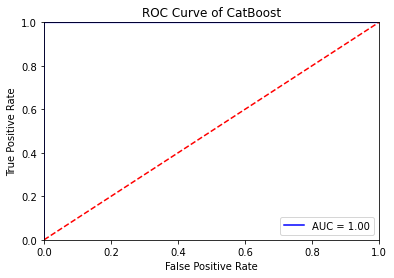

In [144]:
y_scores = catb.predict_proba(x_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of CatBoost')
plt.show()

# Yapay Sinir Ağları

In [145]:
from sklearn.preprocessing import StandardScaler

In [146]:
scaler = StandardScaler()
scaler.fit(x_train)
X_train_scaled = scaler.transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [147]:
mlpc = MLPClassifier().fit(X_train_scaled , y_train)
mlpc.coefs_

[array([[ 9.89585639e-04,  1.64787143e-02,  1.69436281e-02, ...,
          5.15286518e-03,  4.95621389e-02, -1.80483547e-01],
        [ 1.19414218e-04,  3.39377439e-02,  2.51115179e-02, ...,
         -4.91977452e-03, -1.22150640e-01,  2.85141876e-02],
        [ 2.57005398e-03, -2.31568367e-02, -1.42573409e-02, ...,
          6.19965399e-03,  1.22045310e-01, -2.08346926e-02],
        ...,
        [-8.52632657e-01, -1.52813892e-01,  7.14910360e-01, ...,
         -5.69617286e-01, -1.18266523e-01, -4.46176169e-01],
        [-8.22836587e-02,  9.37042310e-02,  1.00867986e-01, ...,
          1.13538028e-01, -8.50749377e-03, -2.03909168e-02],
        [-5.25571466e-02,  8.11545223e-02, -4.53211652e-02, ...,
          8.51363775e-03,  1.05186749e-01, -6.54695487e-02]]),
 array([[ 0.61183957],
        [ 0.14572979],
        [ 0.40524295],
        [ 0.22137776],
        [ 1.06842037],
        [ 0.2879856 ],
        [ 0.29793544],
        [-0.49945678],
        [-0.22643215],
        [-0.27047369],

In [148]:
y_pred = mlpc.predict(X_test_scaled)
accuracy_score(y_test , y_pred)

0.9999440762799542

Model Tuning

In [213]:
mlpc_params = {"alpha" : [0.1],
               "hidden_layer_sizes" : [(10,10),
                                       (100,100),
                                       (100),
                                       (3,5),
                                       (5,3)],
               "solver" : ["lbfgs","adam","sgd"],
               "activation" : ["relu","logistic"]}

In [214]:
mlpc = MLPClassifier()
mlpc_cv_model = GridSearchCV(mlpc , mlpc_params , cv = 10 , n_jobs = -1 , verbose = 2)
mlpc_cv_model.fit(X_train_scaled , y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


GridSearchCV(cv=10, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic'], 'alpha': [0.1],
                         'hidden_layer_sizes': [(10, 10), (100, 100), 100,
                                                (3, 5), (5, 3)],
                         'solver': ['lbfgs', 'adam', 'sgd']},
             verbose=2)

In [216]:
print("En iyi paramtreler: " + str(mlpc_cv_model.best_params_))

En iyi paramtreler: {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (10, 10), 'solver': 'adam'}


In [215]:
mlpc_tuned = MLPClassifier(activation = 'relu',
                           alpha = 0.1,
                           hidden_layer_sizes = (10,10),
                           solver = 'adam')
mlpc_tuned.fit(X_train_scaled , y_train)

MLPClassifier(alpha=0.1, hidden_layer_sizes=(10, 10))

In [217]:
y_pred = mlpc_tuned.predict(x_test)
accuracy_score(y_test , y_pred)

0.3719486620249979

In [218]:
modeller = [
    knn_tuned,
    loj_model,
    #svc_tuned,
    nb_model,
    mlpc_tuned,
    cart_tuned,
    #rf_tuned,
    gbm_tuned,
    catb_tuned,
    lgbm_tuned,
    xgb_tuned
]
for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(x_test)
    dogruluk =accuracy_score(y_test , y_pred)
    print("-"*28)
    print(isimler + ":")
    print("Accuracy: {:.4%}".format(dogruluk))

----------------------------
KNeighborsClassifier:
Accuracy: 82.0764%
----------------------------
LogisticRegression:
Accuracy: 78.9895%
----------------------------
GaussianNB:
Accuracy: 99.2255%
----------------------------
MLPClassifier:
Accuracy: 37.1949%
----------------------------
DecisionTreeClassifier:
Accuracy: 100.0000%
----------------------------
GradientBoostingClassifier:
Accuracy: 100.0000%
----------------------------
CatBoostClassifier:
Accuracy: 100.0000%
----------------------------
LGBMClassifier:
Accuracy: 100.0000%
----------------------------
XGBClassifier:
Accuracy: 100.0000%


### ANN

In [34]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(x_train)

X_train = scaler.transform(x_train)
X_test  = scaler.transform(x_test)

In [35]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Activation , Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [36]:
X_train.shape

(83447, 32)

In [37]:
model = Sequential()

model.add(Dense(30 , activation = 'relu'))
model.add(Dense(15 , activation = 'relu'))
model.add(Dense(15 , activation = 'relu'))
model.add(Dense(1 , activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy' , optimizer = 'adam')

In [38]:
model.fit(x=X_train , y = y_train , epochs = 100 , validation_data = (X_test , y_test) , verbose = 1)

Epoch 1/100
2608/2608 [==============================] - 12s 4ms/step - loss: 0.0565 - val_loss: 1.6849e-04
Epoch 2/100
2608/2608 [==============================] - 6s 2ms/step - loss: 6.9733e-05 - val_loss: 1.6603e-05
Epoch 3/100
2608/2608 [==============================] - 6s 2ms/step - loss: 8.3841e-06 - val_loss: 3.0839e-06
Epoch 4/100
2608/2608 [==============================] - 9s 3ms/step - loss: 1.5962e-06 - val_loss: 6.5367e-07
Epoch 5/100
2608/2608 [==============================] - 6s 2ms/step - loss: 3.6168e-07 - val_loss: 1.7115e-07
Epoch 6/100
2608/2608 [==============================] - 6s 2ms/step - loss: 8.3464e-08 - val_loss: 4.3412e-08
Epoch 7/100
2608/2608 [==============================] - 6s 2ms/step - loss: 2.2355e-08 - val_loss: 1.1257e-08
Epoch 8/100
2608/2608 [==============================] - 6s 2ms/step - loss: 5.3638e-09 - val_loss: 3.6840e-09
Epoch 9/100
2608/2608 [==============================] - 5s 2ms/step - loss: 2.0528e-09 - val_loss: 1.3774e-09
Epoc

In [39]:
model_kaybi = pd.DataFrame(model.history.history)

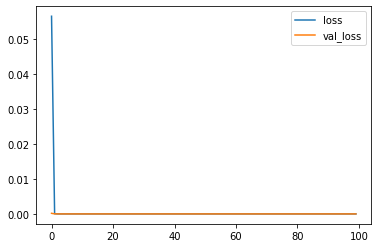

In [40]:
model_kaybi.plot()

In [41]:
model = Sequential()

model.add(Dense(30 , activation = 'relu'))
model.add(Dense(15 , activation = 'relu'))
model.add(Dense(15 , activation = 'relu'))
model.add(Dense(1 , activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy' , optimizer = 'adam')

In [42]:
early_stop = EarlyStopping(monitor = "val_loss" , mode='min' , verbose=1 , patience=25)

In [43]:
model.fit(x=X_train , y = y_train , epochs = 100 , validation_data = (X_test , y_test) , verbose = 1 , callbacks = [early_stop])

Epoch 1/100
2608/2608 [==============================] - 6s 2ms/step - loss: 0.0416 - val_loss: 1.2329e-04
Epoch 2/100
2608/2608 [==============================] - 5s 2ms/step - loss: 5.2942e-05 - val_loss: 1.4436e-05
Epoch 3/100
2608/2608 [==============================] - 5s 2ms/step - loss: 8.2198e-06 - val_loss: 2.5816e-06
Epoch 4/100
2608/2608 [==============================] - 5s 2ms/step - loss: 1.5191e-06 - val_loss: 6.4967e-07
Epoch 5/100
2608/2608 [==============================] - 5s 2ms/step - loss: 3.4781e-07 - val_loss: 1.3950e-07
Epoch 6/100
2608/2608 [==============================] - 6s 2ms/step - loss: 7.7556e-08 - val_loss: 3.6081e-08
Epoch 7/100
2608/2608 [==============================] - 6s 2ms/step - loss: 2.1526e-08 - val_loss: 9.1578e-09
Epoch 8/100
2608/2608 [==============================] - 5s 2ms/step - loss: 5.9112e-09 - val_loss: 3.2701e-09
Epoch 9/100
2608/2608 [==============================] - 6s 2ms/step - loss: 2.4480e-09 - val_loss: 1.3821e-09
Epoch

In [44]:
model_kaybi2 = pd.DataFrame(model.history.history)

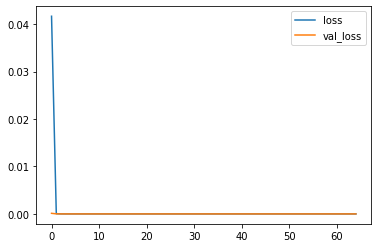

In [45]:
model_kaybi2.plot()

In [46]:
model = Sequential()

model.add(Dense(30 , activation = 'relu'))
model.add(Dropout(0.6))

model.add(Dense(15 , activation = 'relu'))
model.add(Dropout(0.6))

model.add(Dense(15 , activation = 'relu'))
model.add(Dropout(0.6))

model.add(Dense(1 , activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy' , optimizer = 'adam')

In [47]:
model.fit(x=X_train , y = y_train , epochs = 100 , validation_data = (X_test , y_test) , verbose = 1 , callbacks = [early_stop])

2608/2608 [==============================] - 7s 2ms/step - loss: 0.2641 - val_loss: 0.0552
Epoch 2/100
2608/2608 [==============================] - 6s 2ms/step - loss: 0.0922 - val_loss: 0.0437
Epoch 3/100
2608/2608 [==============================] - 6s 2ms/step - loss: 0.0617 - val_loss: 0.0078
Epoch 4/100
2608/2608 [==============================] - 6s 2ms/step - loss: 0.0493 - val_loss: 0.0034
Epoch 5/100
2608/2608 [==============================] - 6s 2ms/step - loss: 0.0471 - val_loss: 0.0024
Epoch 6/100
2608/2608 [==============================] - 6s 2ms/step - loss: 0.0442 - val_loss: 0.0024
Epoch 7/100
2608/2608 [==============================] - 6s 2ms/step - loss: 0.0464 - val_loss: 0.0017
Epoch 8/100
2608/2608 [==============================] - 6s 2ms/step - loss: 0.0442 - val_loss: 0.0023
Epoch 9/100
2608/2608 [==============================] - 6s 2ms/step - loss: 0.0428 - val_loss: 0.0019
Epoch 10/100
2608/2608 [==============================] - 6s 2ms/step - loss: 0.0431 

In [48]:
model_kaybi3 = pd.DataFrame(model.history.history)

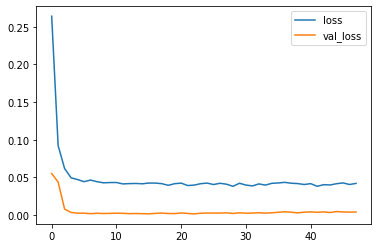

In [49]:
model_kaybi3.plot()

In [50]:
predictions = (model.predict(x_test) > 0.5).astype("int32")

In [51]:
from sklearn.metrics import classification_report , confusion_matrix

In [52]:
print(classification_report(y_test , predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     22461
           1       0.37      1.00      0.54     13302

    accuracy                           0.37     35763
   macro avg       0.19      0.50      0.27     35763
weighted avg       0.14      0.37      0.20     35763



In [53]:
print(confusion_matrix(y_test , predictions))

[[    0 22461]
 [    0 13302]]
